 ## *** <font color=#008000>灌套件 <font> ***

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties as font
#https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb

 # *** <font color=#008000>一、資料說明 <font> ***

### <font color=#0000FF>前三筆的資料</font>

In [2]:
df=pd.read_csv('train1.csv')#讀檔案
new_df = df.head(3)#取前3筆
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### <font color=#0000FF>資料總比數(乘客數)</font>

In [3]:
len(df)

891

### <font color=#0000FF>資料型態</font>

In [4]:
df.dtypes#資料型態

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

### <font color=#0000FF>處理nan</font>

In [5]:
df.fillna({'Age':-1}, inplace=True)
df.fillna({'Cabin':'not_found'}, inplace=True)#船艙號碼
df.fillna({'Embarked':'not_found'}, inplace=True)#登船的口岸
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

#  ***  <font color=#008000>二、單變相數據</font> ***

### <font color=#0000FF>男女統計</font>

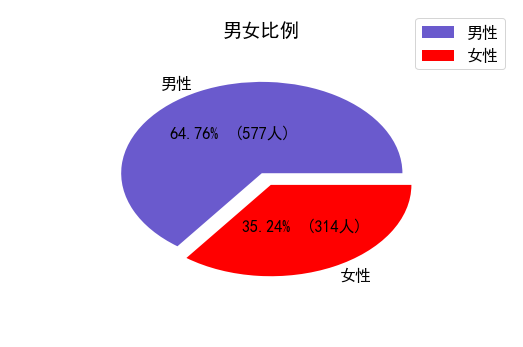

In [6]:
#顯示中文
font = {'family' : 'SimHei',
        'weight' : 'bold',
        'size'   : '16'}
plt.rc('font', **font)               # 步?一（?置字体的更多?性）
plt.rc('axes', unicode_minus=False)  # 步?二（解?坐????的???示??）


#男女人數
male= df[df["Sex"] == 'male'].Sex.values.size;
female = df[df["Sex"] == 'female'].Sex.values.size;

# 分類類型
category = ['男性', '女性']
# 男女數
expend = [male, female]
# 設定顏色
color = ['#6a5acd', '#ff0000']
# 設定圓餅圖大小
plt.figure(figsize=(9,6))
# 依據類別數量，分別設定要突出的距離
separeted = (0, 0.1)

#數值
def make_autopct(expend):
    def my_autopct(pct):
        total = sum(expend)
        val = int(round(pct*total/100.0))
    # 同时显示数值和占比的饼图
        return '{p:.2f}%  ({v:d}人)'.format(p=pct,v=val)
    return my_autopct

# 設定圓餅圖屬性
pictures,category_text,percent_text = plt.pie(
        expend,                           # 數值
        colors = color,                   # 指定圓餅圖的顏色
        labels = category,                # 分類的標記
        autopct = make_autopct(expend),   # 四捨五入至小數點後面位數
        explode = separeted,              # 設定分隔的區塊位置
        pctdistance = 0.5,               # 數值與圓餅圖的圓心距離
        radius = 0.7,                     # 圓餅圖的半徑，預設是1
        center = (0,0),                 # 圓餅圖的圓心座標  
        shadow=False)                     # 是否使用陰影

# 設定legnd的位置
plt.legend(loc = "best")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("男女比例",  x=0.5, y=0.9)

# 畫出圓餅圖
plt.show()

### <font color=#0000FF>生存率</font>

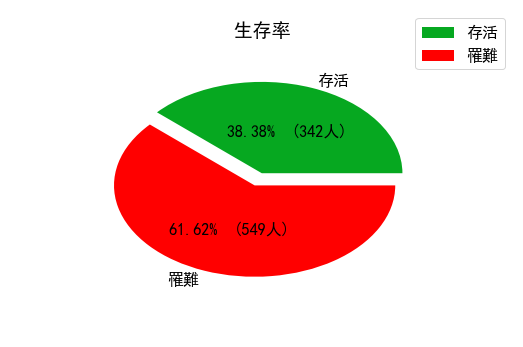

In [7]:
#男女人數
live= df[df["Survived"] == 1].Survived.values.size;
die = df[df["Survived"] == 0].Survived.values.size;

# 分類類型
category = ['存活', '罹難']
# 存活數
expend = [live, die]
# 設定顏色
color = ['#06a820', '#ff0000']
# 設定圓餅圖大小
plt.figure(figsize=(9,6))
# 依據類別數量，分別設定要突出的距離
separeted = (0, 0.1)

#數值
def make_autopct(expend):
    def my_autopct(pct):
        total = sum(expend)
        val = int(round(pct*total/100.0))
    # 同时显示数值和占比的饼图
        return '{p:.2f}%  ({v:d}人)'.format(p=pct,v=val)
    return my_autopct

# 設定圓餅圖屬性
pictures,category_text,percent_text = plt.pie(
        expend,                           # 數值
        colors = color,                   # 指定圓餅圖的顏色
        labels = category,                # 分類的標記
        autopct = make_autopct(expend),   # 四捨五入至小數點後面位數
        explode = separeted,              # 設定分隔的區塊位置
        pctdistance = 0.5,               # 數值與圓餅圖的圓心距離
        radius = 0.7,                     # 圓餅圖的半徑，預設是1
        center = (0,0),                 # 圓餅圖的圓心座標  
        shadow=False)                     # 是否使用陰影

# 設定legnd的位置
plt.legend(loc = "best")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("生存率",  x=0.5, y=0.9)

# 畫出圓餅圖
plt.show()

### <font color=#0000FF>歲數統計</font>

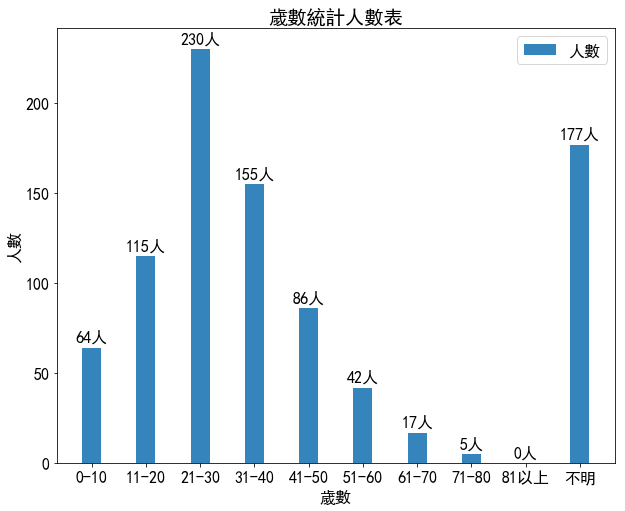

In [8]:
#依歲數計算人數                                    
b=df[df["Age"].between(0.1,10)].Age.values.size 
c=df[df["Age"].between(10.1,20)].Age.values.size
d=df[df["Age"].between(20.1,30)].Age.values.size
e=df[df["Age"].between(30.1,40)].Age.values.size
f=df[df["Age"].between(40.1,50)].Age.values.size
g=df[df["Age"].between(50.1,60)].Age.values.size
h=df[df["Age"].between(60.1,70)].Age.values.size
i=df[df["Age"].between(70.1,80)].Age.values.size
j=df[df["Age"].between(80.1,100)].Age.values.size
k=df[df['Age'] == -1].Age.values.size

#生成資訊
labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81以上','不明']
data1 = [b, c, d, e, f, g, h, i, j, k]
width = 0.7
xpos = np.arange(0,20,2)

#生成柱狀圖
fig, ax = plt.subplots(figsize=(10,8))
bars1 = plt.bar(xpos ,data1, align='center', width=width, alpha=0.9, color='#1f77b4', label = '人數')

#設定每個柱子下面的記號
ax.set_xticks(xpos) #確定每個記號的位置
ax.set_xticklabels(labels)  #確定每個記號的內容

#給每個柱子上面新增標註
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}人'.format(height),
              xy=(rect.get_x() + rect.get_width() / 2, height),
              xytext=(0, 3),  # 3 points vertical offset
              textcoords="offset points",
              ha='center', va='bottom'
              )
autolabel(bars1)

#展示結果
plt.legend()
#lable
plt.title("歲數統計人數表") # title
plt.ylabel("人數") # y label
plt.xlabel("歲數") # x label
plt.show()

### <font color=#0000FF>船艙等級統計</font>

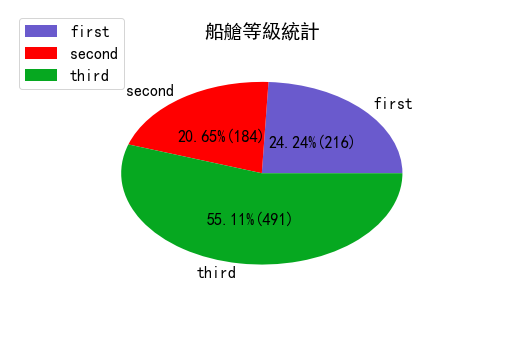

In [9]:
first = df[df['Pclass'] == 1].Pclass.values.size
second = df[df['Pclass'] == 2].Pclass.values.size
third = df[df['Pclass'] == 3].Pclass.values.size
#print(first,second,third)
# 分類類型
category = ['first', 'second','third']
# 數值統計
expend = [first, second, third]
# 設定顏色
color = ['#6a5acd', '#ff0000', '#06a820']
# 設定圓餅圖大小
plt.figure(figsize=(9,6))
# 依據類別數量，分別設定要突出的距離
separeted = (0, 0.1)

#數值
def make_autopct(expend):
    def my_autopct(pct):
        total = sum(expend)
        val = int(round(pct*total/100.0))
    # 同时显示数值和占比的饼图
        return '{p:.2f}%({v:d})'.format(p=pct,v=val)
    return my_autopct

# 設定圓餅圖屬性
pictures,category_text,percent_text = plt.pie(
        expend,                           # 數值
        colors = color,                   # 指定圓餅圖的顏色
        labels = category,                # 分類的標記
        autopct = make_autopct(expend),   # 四捨五入至小數點後面位數
      #  explode = separeted,              # 設定分隔的區塊位置
        pctdistance = 0.5,               # 數值與圓餅圖的圓心距離
        radius = 0.7,                     # 圓餅圖的半徑，預設是1
        center = (0,0),                 # 圓餅圖的圓心座標  
        shadow=False)                     # 是否使用陰影

# 設定legnd的位置
plt.legend(loc = "best")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("船艙等級統計",  x=0.5, y=0.9)

# 畫出圓餅圖
plt.show()



### <font color=#0000FF>有兄弟姐妹/配偶的人數</font>

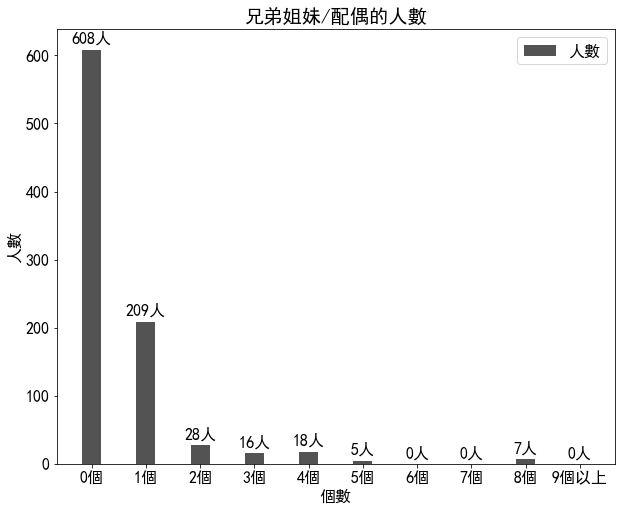

In [10]:
#依歲數計算人數  
zero = df[df['SibSp'] == 0].SibSp.values.size
one= df[df['SibSp'] == 1].SibSp.values.size
two= df[df['SibSp'] == 2].SibSp.values.size
three=df[df['SibSp'] == 3].SibSp.values.size
four=df[df['SibSp'] == 4].SibSp.values.size
five=df[df['SibSp'] == 5].SibSp.values.size
six=df[df['SibSp'] == 6].SibSp.values.size
seven=df[df['SibSp'] == 7].SibSp.values.size
eight=df[df['SibSp'] == 8].SibSp.values.size
more=df[df['SibSp'] >= 9].SibSp.values.size
#生成資訊
labels = ['0個','1個','2個','3個','4個','5個','6個','7個','8個','9個以上']
data1 = [zero,one,two,three,four,five,six,seven,eight,more]
width = 0.7
xpos = np.arange(0,20,2)

#生成柱狀圖
fig, ax = plt.subplots(figsize=(10,8))
bars1 = plt.bar(xpos ,data1, align='center', width=width, alpha=0.9, color='#404040', label = '人數')

#設定每個柱子下面的記號
ax.set_xticks(xpos) #確定每個記號的位置
ax.set_xticklabels(labels)  #確定每個記號的內容

#給每個柱子上面新增標註
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}人'.format(height),
              xy=(rect.get_x() + rect.get_width() / 2, height),
              xytext=(0, 3),  # 3 points vertical offset
              textcoords="offset points",
              ha='center', va='bottom'
              )
autolabel(bars1)

#展示結果
plt.legend()
#lable
plt.title("兄弟姐妹/配偶的人數") # title
plt.ylabel("人數") # y label
plt.xlabel("個數") # x label
plt.show()



### <font color=#0000FF>有父母/小孩的人數</font>

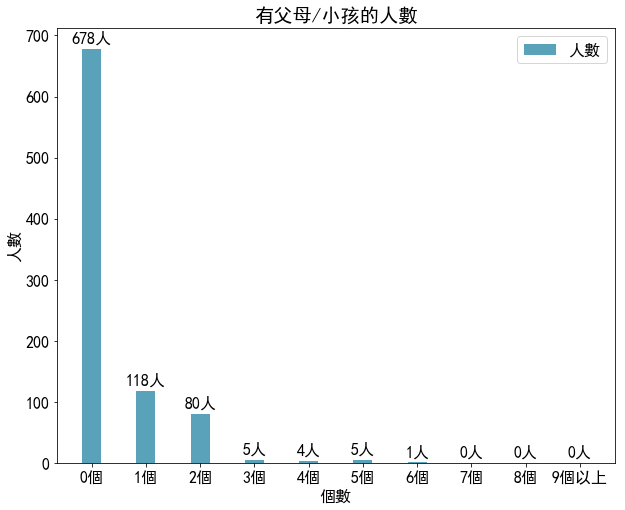

In [11]:
#依歲數計算人數  
zero = df[df['Parch'] == 0].Parch.values.size
one= df[df['Parch'] == 1].Parch.values.size
two= df[df['Parch'] == 2].Parch.values.size
three=df[df['Parch'] == 3].Parch.values.size
four=df[df['Parch'] == 4].Parch.values.size
five=df[df['Parch'] == 5].Parch.values.size
six=df[df['Parch'] == 6].Parch.values.size
seven=df[df['Parch'] == 7].Parch.values.size
eight=df[df['Parch'] == 8].Parch.values.size
more=df[df['Parch'] >= 9].Parch.values.size
#生成資訊
labels = ['0個','1個','2個','3個','4個','5個','6個','7個','8個','9個以上']
data1 = [zero,one,two,three,four,five,six,seven,eight,more]
width = 0.7
xpos = np.arange(0,20,2)

#生成柱狀圖
fig, ax = plt.subplots(figsize=(10,8))
bars1 = plt.bar(xpos ,data1, align='center', width=width, alpha=0.9, color='#4798b3', label = '人數')

#設定每個柱子下面的記號
ax.set_xticks(xpos) #確定每個記號的位置
ax.set_xticklabels(labels)  #確定每個記號的內容

#給每個柱子上面新增標註
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}人'.format(height),
              xy=(rect.get_x() + rect.get_width() / 2, height),
              xytext=(0, 3),  # 3 points vertical offset
              textcoords="offset points",
              ha='center', va='bottom'
              )
autolabel(bars1)

#展示結果
plt.legend()
#lable
plt.title("有父母/小孩的人數") # title
plt.ylabel("人數") # y label
plt.xlabel("個數") # x label
plt.show()



### <font color=#0000FF>登船的口岸</font>

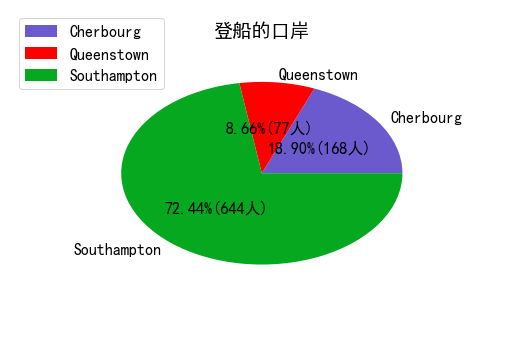

In [12]:
C = df[df['Embarked'] == 'C'].Embarked.values.size
Q = df[df['Embarked'] == 'Q'].Embarked.values.size
S = df[df['Embarked'] == 'S'].Embarked.values.size
#print(first,second,third)
# 分類類型
category = ['Cherbourg', 'Queenstown','Southampton']
# 數值統計
expend = [C, Q, S]
# 設定顏色
color = ['#6a5acd', '#ff0000', '#06a820']
# 設定圓餅圖大小
plt.figure(figsize=(9,6))
# 依據類別數量，分別設定要突出的距離
separeted = (0, 0.1)

#數值
def make_autopct(expend):
    def my_autopct(pct):
        total = sum(expend)
        val = int(round(pct*total/100.0))
    # 同时显示数值和占比的饼图
        return '{p:.2f}%({v:d}人)'.format(p=pct,v=val)
    return my_autopct

# 設定圓餅圖屬性
pictures,category_text,percent_text = plt.pie(
        expend,                           # 數值
        colors = color,                   # 指定圓餅圖的顏色
        labels = category,                # 分類的標記
        autopct = make_autopct(expend),   # 四捨五入至小數點後面位數
      #  explode = separeted,              # 設定分隔的區塊位置
        pctdistance = 0.5,               # 數值與圓餅圖的圓心距離
        radius = 0.7,                     # 圓餅圖的半徑，預設是1
        center = (0,0),                 # 圓餅圖的圓心座標  
        shadow=False)                     # 是否使用陰影

# 設定legnd的位置
plt.legend(loc = "best")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("登船的口岸",  x=0.5, y=0.9)

# 畫出圓餅圖
plt.show()



#  ***  <font color=#008000>三、雙變相數據</font> ***

### <font color=#0000FF>男女生存</font>

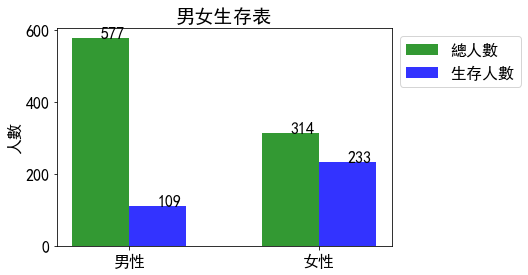

In [13]:
#https://waynestalk.com/python-bar-charts/
ALL = ['男性', '女性']
#計算男女總人數
count_male= df[df["Sex"] == 'male'].Sex.values.size;
count_female = df[df["Sex"] == 'female'].Sex.values.size;
#計算男女生存人數
count_livem = df[(df["Sex"] == 'male') & (df["Survived"] == 1)].Sex.values.size;
count_livef = df[(df["Sex"] == 'female') & (df["Survived"] == 1)].Sex.values.size;

count_liveall = [count_livem,count_livef]
count_sexall = [count_male, count_female]

x = np.arange(len(ALL))
width = 0.3

plt.bar(x, count_sexall, width, color='green', label='總人數',alpha = 0.8,)
plt.bar(x + width, count_liveall, width, color='blue', label='生存人數',alpha = 0.8)
plt.xticks(x + width / 2, ALL)
plt.ylabel('人數')
plt.title('男女生存表')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
for x1,y1 in enumerate(count_sexall): plt.text(x1, y1, '%s'%y1) 
for x2,y2 in enumerate(count_liveall): plt.text(x2+width, y2, '%s'%y2)

#### ***<font color='gray'>由上圖表所知男性生存率特別低，女性反而比男性高很多，可能因為女性是優先救援對象</font>***
#### ***<font color='gray'>因此先透過親友關係來觀察看看</font>***

### <font color=#0000FF>有親友生存率</font>

男性有家人生存率：27.11%   女性有家人生存率：71.28%


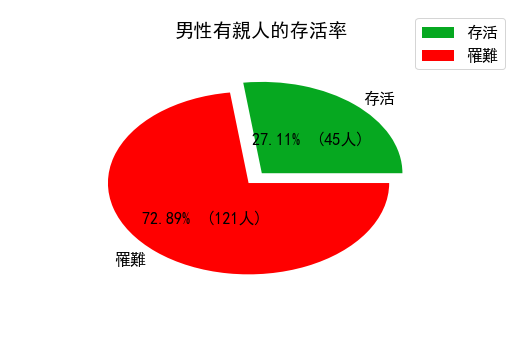

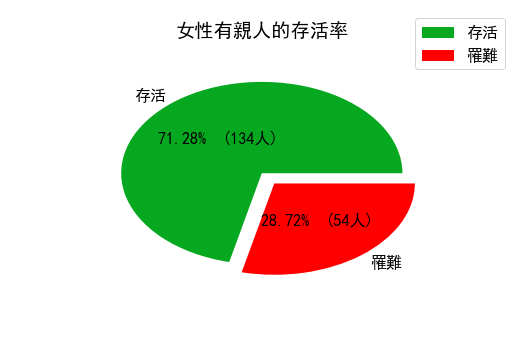

In [14]:
#計算有家人的男性資料
male_d =  df[(df["Sex"] == 'male') & (df["Survived"] == 0) & ((df["SibSp"]>=1)|(df["Parch"]>=1))].Sex.values.size;
male_s =  df[(df["Sex"] == 'male') & (df["Survived"] == 1) & ((df["SibSp"]>=1)|(df["Parch"]>=1))].Sex.values.size;
male =  df[(df["Sex"] == 'male') & ((df["SibSp"]>=1)|(df["Parch"]>=1))].Sex.values.size;
m = male_s/male
#計算有家人的女性資料
female_d =  df[(df["Sex"] == 'female') & (df["Survived"] == 0) & ((df["SibSp"]>=1)|(df["Parch"]>=1))].Sex.values.size;
female_s =  df[(df["Sex"] == 'female') & (df["Survived"] == 1) & ((df["SibSp"]>=1)|(df["Parch"]>=1))].Sex.values.size;
female =  df[(df["Sex"] == 'female') & ((df["SibSp"]>=1)|(df["Parch"]>=1))].Sex.values.size;
f = female_s/female

print('男性有家人生存率：'+'{:.2%}'.format(m),'  '+'女性有家人生存率：'+'{:.2%}'.format(f))

# 分類類型
category = ['存活', '罹難']
# 存活數
expend = [male_s, male_d]
# 設定顏色
color = ['#06a820', '#ff0000']
# 設定圓餅圖大小
plt.figure(figsize=(9,6))
# 依據類別數量，分別設定要突出的距離
separeted = (0, 0.1)
#數值
def make_autopct(expend):
    def my_autopct(pct):
        total = sum(expend)
        val = int(round(pct*total/100.0))
    # 同时显示数值和占比的饼图
        return '{p:.2f}%  ({v:d}人)'.format(p=pct,v=val)
    return my_autopct

# 設定圓餅圖屬性
pictures,category_text,percent_text = plt.pie(
        expend,                           # 數值
        colors = color,                   # 指定圓餅圖的顏色
        labels = category,                # 分類的標記
        autopct = make_autopct(expend),   # 四捨五入至小數點後面位數
        explode = separeted,              # 設定分隔的區塊位置
        pctdistance = 0.5,               # 數值與圓餅圖的圓心距離
        radius = 0.7,                     # 圓餅圖的半徑，預設是1
        center = (0,0),                 # 圓餅圖的圓心座標  
        shadow=False)                     # 是否使用陰影

# 設定legnd的位置
plt.legend(loc = "best")
# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("男性有親人的存活率",  x=0.5, y=0.9)
#--------------------------------------------------------------------------------
# 分類類型
category = ['存活', '罹難']
# 存活數
expend = [female_s, female_d]
# 設定顏色
color = ['#06a820', '#ff0000']
# 設定圓餅圖大小
plt.figure(figsize=(9,6))
# 依據類別數量，分別設定要突出的距離
separeted = (0, 0.1)
#數值
def make_autopct(expend):
    def my_autopct(pct):
        total = sum(expend)
        val = int(round(pct*total/100.0))
    # 同时显示数值和占比的饼图
        return '{p:.2f}%  ({v:d}人)'.format(p=pct,v=val)
    return my_autopct

# 設定圓餅圖屬性
pictures,category_text,percent_text = plt.pie(
        expend,                           # 數值
        colors = color,                   # 指定圓餅圖的顏色
        labels = category,                # 分類的標記
        autopct = make_autopct(expend),   # 四捨五入至小數點後面位數
        explode = separeted,              # 設定分隔的區塊位置
        pctdistance = 0.5,               # 數值與圓餅圖的圓心距離
        radius = 0.7,                     # 圓餅圖的半徑，預設是1
        center = (0,0),                 # 圓餅圖的圓心座標  
        shadow=False)                     # 是否使用陰影

# 設定legnd的位置
plt.legend(loc = "best")
# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("女性有親人的存活率",  x=0.5, y=0.9)

# 畫出圓餅圖
plt.show()


#### ***<font color='gray'>由上圖表所知推測，男性可能為了救親人而罹難，女性在親人中是先救援對象</font>***
#### ***<font color='gray'>因此當時事故男性存活率較低跟是否有親友也有關係</font>***